In this notebook I search to optimize a crypto portfolio.

This metodology allows to asign a portion of capital between financial assets, maximizing severals stats. E.g. Sharpe Ratio, volatility or Risk.

The cryptos I chose to build an optimized portfolio are:
 - Bitcoin
 - Ethereum
 - Binance Coin
 - Solana
 - Cardano
 - NEAR Protocol
 - Avalanche
 - Artificial Superintelligence Alliance

In [1]:
from pypfopt import risk_models
from pypfopt import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import DiscreteAllocation
from pypfopt import objective_functions

import pandas as pd
import yfinance as yf

In [4]:
import sys
import os
sys.path.append(os.path.abspath('/home/juan/haku/tools'))

from basic_functions import get_crypto_data

In [22]:
portfolio_symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'SOLUSDT', 'ADAUSDT', 'NEARUSDT', 'AVAXUSDT', 'FETUSDT']

In [23]:
# extracting the data from csvs and building a dataframe with daily returns
dfs = {}
for s in portfolio_symbols:
    dfs[s] = get_crypto_data(symbol=s, timeframe='1d')

for key, value in dfs.items():
    dfs[key] = value['Close']

In [28]:
returns_df = pd.DataFrame(dfs)

In [26]:
returns_df

,BTCUSDT,ETHUSDT,BNBUSDT,SOLUSDT,ADAUSDT,NEARUSDT,AVAXUSDT,FETUSDT
Date,,,,,,,,
2017-08-18,4108.370,293.960,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-19,4139.980,290.910,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-20,4086.290,299.100,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-21,4016.000,323.290,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-22,4040.000,309.800,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-08-27,59415.000,2457.330,533.300,146.790,0.350,4.528,24.090,1.287
2024-08-28,59034.900,2528.330,537.000,143.950,0.350,4.345,23.450,1.195
2024-08-29,59359.010,2527.610,536.400,140.000,0.358,4.211,22.890,1.125


In [58]:
# Creating a model that calculate the Covariance Shrinkage, 
# statistic technique used to estimate the covariance matrix of financial assets.

S = risk_models.CovarianceShrinkage(returns_df).ledoit_wolf() # ledoit wolf is a popular method of shrinkage
S

,BTCUSDT,ETHUSDT,BNBUSDT,SOLUSDT,ADAUSDT,NEARUSDT,AVAXUSDT,FETUSDT
BTCUSDT,0.374,0.358,0.326,0.174,0.295,0.176,0.180,0.263
ETHUSDT,0.358,0.589,0.406,0.261,0.420,0.240,0.243,0.360
BNBUSDT,0.326,0.406,0.776,0.259,0.363,0.220,0.250,0.344
SOLUSDT,0.174,0.261,0.259,0.684,0.280,0.343,0.360,0.337
ADAUSDT,0.295,0.420,0.363,0.280,0.655,0.275,0.317,0.397
NEARUSDT,0.176,0.240,0.220,0.343,0.275,0.685,0.358,0.371
AVAXUSDT,0.180,0.243,0.250,0.360,0.317,0.358,0.640,0.332
FETUSDT,0.263,0.360,0.344,0.337,0.397,0.371,0.332,1.140


<Axes: >

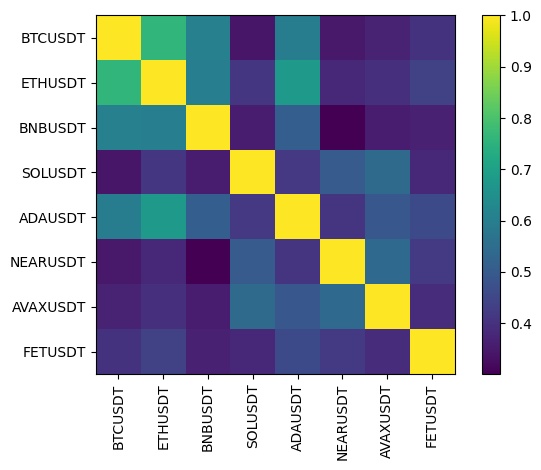

In [59]:
plotting.plot_covariance(S, plot_correlation=True)

In [32]:
# Calculating the CAMP (Capital Asset Pricing Model). Searching the relation between risk and expected return of an asset 
mu = expected_returns.capm_return(returns_df)
mu

BTCUSDT    0.365
ETHUSDT    0.474
BNBUSDT    0.508
SOLUSDT    0.573
ADAUSDT    0.490
NEARUSDT   0.582
AVAXUSDT   0.578
FETUSDT    0.612
Name: mkt, dtype: float64

In [54]:
# Calculating Efficient Frontier, with the objective to create diversified portfolios 
# and find the optimal combination of assets based on different financial objectives and constraints.
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()

In [55]:
cleaned_weights

OrderedDict([('BTCUSDT', 0.43169),
             ('ETHUSDT', 0.02367),
             ('BNBUSDT', 0.05462),
             ('SOLUSDT', 0.14002),
             ('ADAUSDT', 0.05113),
             ('NEARUSDT', 0.1443),
             ('AVAXUSDT', 0.14243),
             ('FETUSDT', 0.01213)])

In [56]:
ef.portfolio_performance(verbose=True)

Expected annual return: 47.6%
Annual volatility: 54.7%
Sharpe Ratio: 0.83


(0.4755642792093668, 0.5469458574934213, 0.832923904565538)

<Axes: >

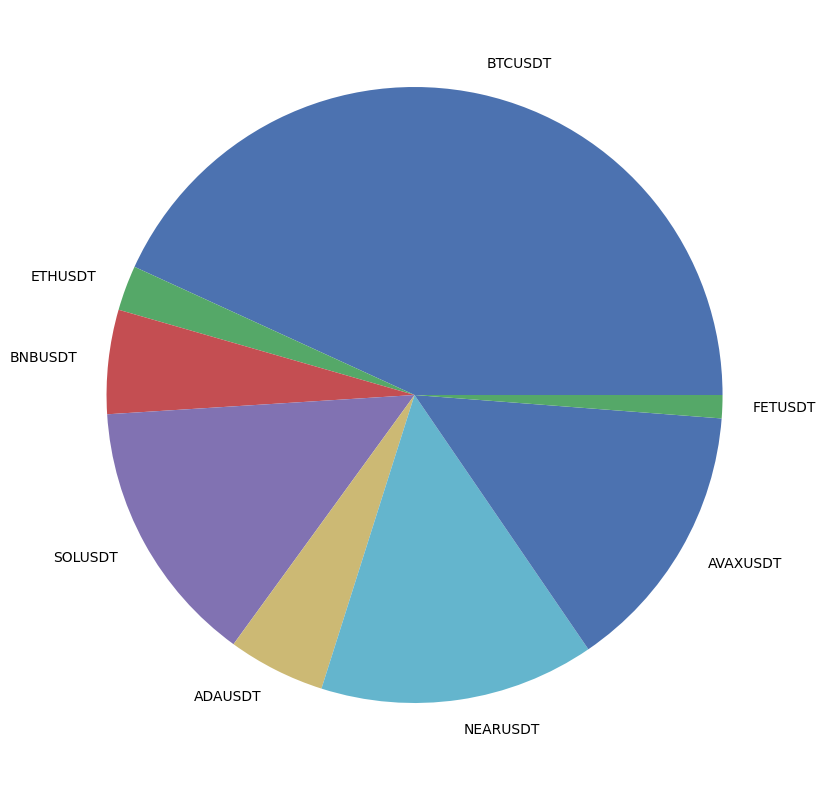

In [57]:
pd.Series(weights).plot.pie(figsize=(10,10))

Based on the optimization, the portfolio allocates: **43.17%** to BTCUSDT, **14.43%** to NEARUSDT, **14.24%** to AVAXUSDT, and **14.00%** to SOLUSDT, forming the bulk of the investment. 

Additionally, **5.46%** is allocated to BNBUSDT, **5.11%** to ADAUSDT, **2.37%** to ETHUSDT, and **1.21%** to FETUSDT. 

This balanced distribution ensures a broad exposure to the cryptocurrency market while aiming to optimize returns based on the assets' expected performance and risk levels.